In [1]:
from transfer_function import make_kernel_RD, analytical_kernel_RD
import matplotlib.pyplot as plt
import numpy as np
from Omega import P_k_lognormal,P_theta,P_theta_vec, compute_Omega_RD_today, compute_Omega_RD_today_fast, compute_Omega_eMD_today, compute_Omega_eMD_today_fast
from transfer_function import kernel_eMD_resonant
import scienceplots
import matplotlib as mpl
from gwbird import pls
import matplotlib.cm as cm
import matplotlib.ticker as ticker
from tqdm import tqdm


In [2]:
cmap = cm.get_cmap('viridis', 7)
colors = [cmap(i) for i in range(cmap.N)]
plt.style.use(['science', 'no-latex'])
plt.style.use('seaborn-v0_8-bright')
mpl.rcParams["figure.dpi"] = 110      # prova 90–130
mpl.rcParams["savefig.dpi"] = 110

In [3]:
f = np.logspace(0, 3, 1000)
fref = 25
snr_ = 1
Tobs = 1
psi = 0
pls_ET = pls.PLS('ET X', 'ET Y', f, fref, 't', snr_, Tobs, psi)
pls_ET2L0 = pls.PLS('ET L1', 'ET L2', f, fref, 't', snr_, Tobs, psi, 0)
pls_ET2L425 = pls.PLS('ET L1', 'ET L2', f, fref, 't', snr_, Tobs, psi, np.deg2rad(42.5))


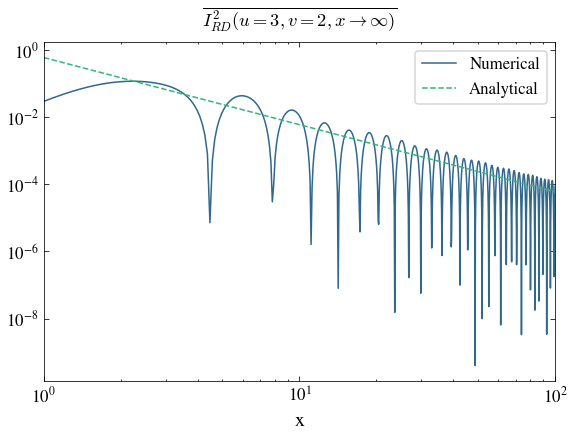

In [ ]:
cs_value=1/np.sqrt(3)
u_val=3
v_val=2
x_start=1
x_end=100
num_points=1000
x_values = np.linspace(x_start, x_end, num_points)

I_RD = make_kernel_RD()
kernel_values = np.array([I_RD(u_val, v_val, x)**2 for x in x_values])
analytical_values = np.array([analytical_kernel_RD(u_val, v_val, x) for x in x_values])



plt.figure(figsize=(6, 4))
plt.plot(x_values, kernel_values, label='Numerical', color=colors[2])
plt.plot(x_values, analytical_values, label='Analytical', linestyle='--', color=colors[4])

plt.xscale('log')
plt.yscale('log')
plt.xlabel('x', fontsize=13)
plt.xlim(x_start, x_end)
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.LogFormatterSciNotation())
ax.yaxis.set_major_formatter(ticker.LogFormatterSciNotation())
ax.tick_params(axis='both', which='major', labelsize=11)
ax.tick_params(axis='both', which='minor', labelsize=9) 

plt.legend(fontsize=11, frameon=True, loc='best')
plt.title(r'$\overline{I_{RD}^2(u=3, v=2, x \to \infty)}$', fontsize=12, pad=10)
plt.show()




Computing Omega_GW: 100%|██████████| 150/150 [00:02<00:00, 68.22k-value/s]


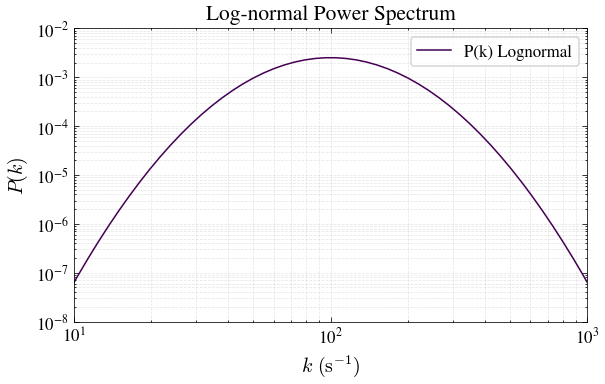

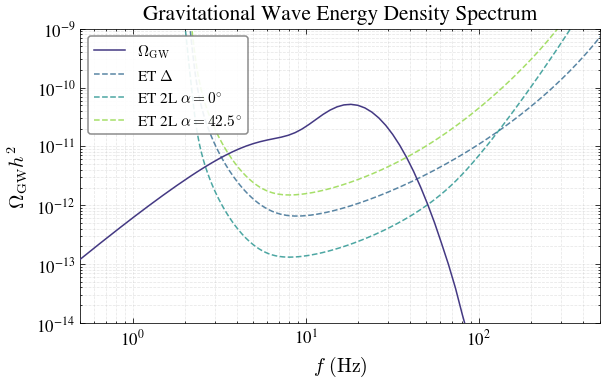

In [ ]:
cs_value = 1/np.sqrt(3)
Omega_r0_hh = 4.2e-5
c_g = 0.39
log10_As = -2.50
log10_sigma = np.log10(0.5)
log10_k_p = 2.00

As = 10**log10_As
sigma = 10**log10_sigma
k_p = 10**log10_k_p
k_values = np.logspace(log10_k_p-3, log10_k_p+3, 150)
f_values = k_values / (2 * np.pi)

P_k = []
Omega = []
P_func = lambda kk: P_k_lognormal(kk, k_p, sigma, As)

for k in tqdm(k_values, desc="Computing Omega_GW", unit="k-value"):
    P_k_value = P_k_lognormal(k, k_p, sigma, As)
    P_k.append(P_k_value)

    Omega_value,_ = compute_Omega_RD_today(k, cs_value, P_func, Omega_r0_hh, c_g)
    Omega.append(Omega_value)



plt.figure(figsize=(6, 4))
plt.plot(k_values, P_k, label='P(k) Lognormal', color=colors[0], linewidth=1)
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e1, 1e3)
plt.ylim(1e-8, 1e-2)


ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.LogFormatterSciNotation())
ax.yaxis.set_major_formatter(ticker.LogFormatterSciNotation())
ax.tick_params(axis='both', which='major', labelsize=11)
ax.tick_params(axis='both', which='minor', labelsize=9)
plt.xlabel(r'$k \ (\mathrm{s}^{-1})$', fontsize=13)
plt.ylabel(r'$P(k)$', fontsize=13)

plt.title('Log-normal Power Spectrum', fontsize=14)
plt.legend(fontsize=11, frameon=True, loc='best')
plt.grid(True, alpha=0.3, linestyle='--', which='both')
plt.tight_layout()
plt.show()


plt.figure(figsize=(6, 4))
plt.plot(f_values, Omega, label=r'$\Omega_{\mathrm{GW}}$', color=colors[1], linewidth=1, zorder=5)
plt.plot(f, pls_ET, label=r'ET $\Delta$', color=colors[2], linewidth=1, linestyle='--', alpha=0.8)
plt.plot(f, pls_ET2L0, label=r'ET 2L $\alpha=0^{\circ}$', color=colors[3], linewidth=1, linestyle='--', alpha=0.8)
plt.plot(f, pls_ET2L425, label=r'ET 2L $\alpha=42.5^{\circ}$', color=colors[5], linewidth=1, linestyle='--', alpha=0.8)

plt.xscale('log')
plt.yscale('log')
plt.xlim(5e-1, 5e2)
plt.ylim(1e-14, 1e-9)
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.LogFormatterSciNotation())
ax.yaxis.set_major_formatter(ticker.LogFormatterSciNotation())
ax.tick_params(axis='both', which='major', labelsize=11)
ax.tick_params(axis='both', which='minor', labelsize=9)
plt.xlabel(r'$f \ (\mathrm{Hz})$', fontsize=13)
plt.ylabel(r'$\Omega_{\mathrm{GW}} h^2$', fontsize=13)

plt.title(r'Gravitational Wave Energy Density Spectrum', fontsize=14)
plt.legend(loc='upper left', fontsize=10, frameon=True, framealpha=0.9, edgecolor='gray')
plt.grid(True, alpha=0.3, linestyle='--', which='both')
plt.tight_layout()
plt.savefig("../immagini codici/Omega_GW_RD_lognormal.png", dpi=300, bbox_inches='tight')
plt.show()

Computing Omega_GW: 100%|██████████| 150/150 [00:00<00:00, 260.98k-value/s]


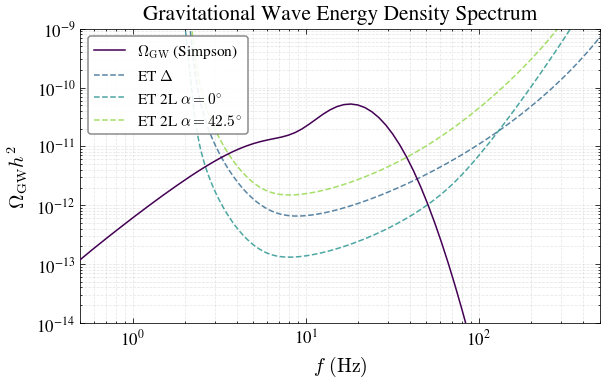

In [ ]:
cs_value = 1/np.sqrt(3)
Omega_r0_hh = 4.2e-5
c_g = 0.39
log10_As = -2.50
log10_sigma = np.log10(0.5)
log10_k_p = 2.00

As = 10**log10_As
sigma = 10**log10_sigma
k_p = 10**log10_k_p
k_values = np.logspace(log10_k_p-3, log10_k_p+3, 150)
f_values = k_values / (2 * np.pi)

P_k = []
Omega_simp = []
P_func = lambda kk: P_k_lognormal(kk, k_p, sigma, As)

for k in tqdm(k_values, desc="Computing Omega_GW", unit="k-value"):
    P_k_value = P_k_lognormal(k, k_p, sigma, As)
    P_k.append(P_k_value)

    Omega_value_simp,_ = compute_Omega_RD_today_fast(k, cs_value,P_func, Omega_r0_hh, c_g, t_max=100, N_s=100, N_t_1=100, N_t_2=100, N_t_3=700)
    Omega_simp.append(Omega_value_simp)
    

plt.figure(figsize=(6, 4))
plt.plot(f_values, Omega_simp, label=r'$\Omega_{\mathrm{GW}}$ (Simpson)', color=colors[0], linewidth=1, zorder=4)
#remove comment to compare with dblquad
#plt.plot(f_values, Omega, label=r'$\Omega_{\mathrm{GW}}$', color=colors[1], linewidth=1, zorder=5)

plt.plot(f, pls_ET, label=r'ET $\Delta$', color=colors[2], linewidth=1, linestyle='--', alpha=0.8)
plt.plot(f, pls_ET2L0, label=r'ET 2L $\alpha=0^{\circ}$', color=colors[3], linewidth=1, linestyle='--', alpha=0.8)
plt.plot(f, pls_ET2L425, label=r'ET 2L $\alpha=42.5^{\circ}$', color=colors[5], linewidth=1, linestyle='--', alpha=0.8)





plt.xscale('log')
plt.yscale('log')
plt.xlim(5e-1, 5e2)
plt.ylim(1e-14, 1e-9)
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.LogFormatterSciNotation())
ax.yaxis.set_major_formatter(ticker.LogFormatterSciNotation())
ax.tick_params(axis='both', which='major', labelsize=11)
ax.tick_params(axis='both', which='minor', labelsize=9)
plt.xlabel(r'$f \ (\mathrm{Hz})$', fontsize=13)
plt.ylabel(r'$\Omega_{\mathrm{GW}} h^2$', fontsize=13)

plt.title(r'Gravitational Wave Energy Density Spectrum', fontsize=14)
plt.legend(loc='upper left', fontsize=10, frameon=True, framealpha=0.9, edgecolor='gray')
plt.grid(True, alpha=0.3, linestyle='--', which='both')
plt.tight_layout()
plt.show()


Cutoff wavenumber k_max: 125.0 s^-1
Cutoff frequency f_max: 19.89436788648692 Hz


Computing Omega_GW eMD:  80%|███████▉  | 63/79 [00:12<00:04,  3.47k-value/s] IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
Computing Omega_GW eMD: 100%|██████████| 79/79 [00:25<00:00,  3.11k-value/s]


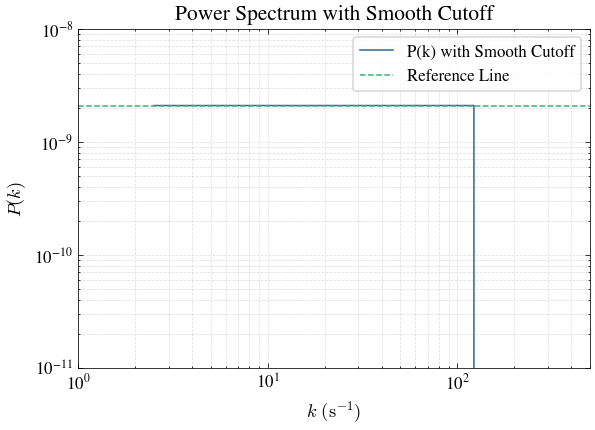

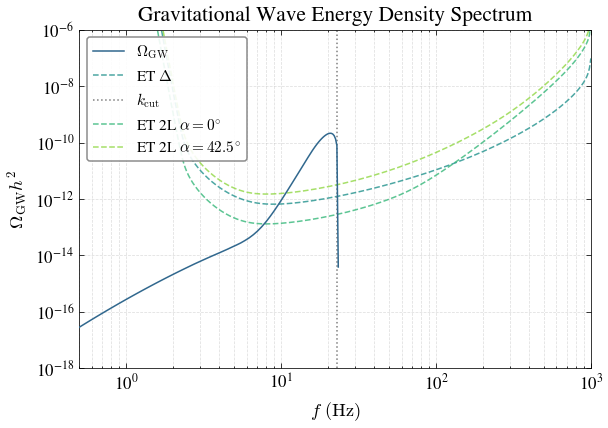

In [ ]:
A_s = 2.1e-9
eta_R = 0.96  # s
k_max = 120/eta_R # s^-1
Omega_r0_hh = 4.2e-5
c_g = 0.39
print(f"Cutoff wavenumber k_max: {k_max} s^-1")
f_max = k_max / (2 * np.pi)
print(f"Cutoff frequency f_max: {f_max} Hz")

k_thr = 2*k_max/np.sqrt(3)

k1 = np.logspace(np.log10(0.02*k_max), np.log10(0.8*k_max), 60)
k2 = np.logspace(np.log10(0.8*k_max),  np.log10(1.02*k_thr), 20)

k_values = np.unique(np.sort(np.concatenate([k1, k2])))
f_values = k_values / (2 * np.pi)
P_k = []
Omega_total = []
P_func = lambda kk: P_theta(kk,k_max, A_s)

for k in tqdm(k_values, desc="Computing Omega_GW eMD", unit="k-value"):
    P_k_value = P_theta(k,k_max, A_s)
    P_k.append(P_k_value)
    Omega_value, _ = compute_Omega_eMD_today(k,eta_R,k_max,P_func,Omega_r0_hh,c_g)
    Omega_total.append(Omega_value)

plt.figure(figsize=(6, 4))
plt.plot(k_values, P_k, label='P(k) with Smooth Cutoff', color=colors[2], linewidth=1)
plt.axhline(y=A_s, color=colors[4], linestyle='--', label='Reference Line')

plt.xscale('log')
plt.yscale('log')
plt.xlim(1e0, 5e2)
plt.ylim(1e-11,1e-8)
plt.xlabel(r'$k \ (\mathrm{s}^{-1})$', fontsize=12)
plt.ylabel(r'$P(k)$', fontsize=12)
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.LogFormatterSciNotation())
ax.yaxis.set_major_formatter(ticker.LogFormatterSciNotation())
ax.tick_params(axis='both', which='major', labelsize=11)
ax.tick_params(axis='both', which='minor', labelsize=9)

plt.title('Power Spectrum with Smooth Cutoff', fontsize=14)
plt.grid(True, which="both", ls="--", alpha=0.4)
plt.legend(fontsize=11, frameon=True, loc='best')
plt.show()    



plt.figure(figsize=(6, 4))
plt.plot(f_values, Omega_total, label=r'$\Omega_{\mathrm{GW}}$', color=colors[2],linewidth=1,zorder=5)
plt.plot(f, pls_ET, label=r'ET $\Delta$', color=colors[3], linewidth=1, linestyle='--', alpha=0.8)
plt.axvline(x=f_max*2/np.sqrt(3), color='gray', linestyle=':', label=r'$k_{\mathrm{cut}}$')
plt.plot(f, pls_ET2L0, label=r'ET 2L $\alpha=0^{\circ}$', color=colors[4], linewidth=1, linestyle='--', alpha=0.8)
plt.plot(f, pls_ET2L425, label=r'ET 2L $\alpha=42.5^{\circ}$', color=colors[5], linewidth=1, linestyle='--', alpha=0.8)

plt.xscale('log')
plt.yscale('log')
plt.xlim(5e-1, 1e3)
plt.ylim(1e-18, 1e-6)
plt.xlabel(r'$f \ (\mathrm{Hz})$', fontsize=12)
plt.ylabel(r'$\Omega_{\mathrm{GW}} h^2$', fontsize=12)
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.LogFormatterSciNotation())
ax.yaxis.set_major_formatter(ticker.LogFormatterSciNotation())
ax.tick_params(axis='both', which='major', labelsize=11)
ax.tick_params(axis='both', which='minor', labelsize=9)

plt.title(r'Gravitational Wave Energy Density Spectrum', fontsize=14)
plt.legend(loc='upper left', fontsize=10, frameon=True, framealpha=0.9, edgecolor='gray')
plt.grid(True, which="both", ls="--", alpha=0.4)
plt.show()


Cutoff wavenumber k_max: 125.0 s^-1
Cutoff frequency f_max: 19.89436788648692 Hz


Computing Omega_GW eMD: 100%|██████████| 119/119 [00:00<00:00, 266.30k-value/s]


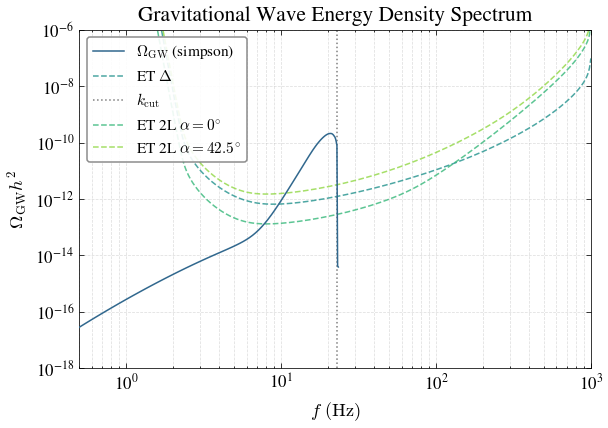

In [ ]:
A_s = 2.1e-9
eta_R = 0.96  # s
k_max = 120/eta_R # s^-1
Omega_r0_hh = 4.2e-5
c_g = 0.39
print(f"Cutoff wavenumber k_max: {k_max} s^-1")
f_max = k_max / (2 * np.pi)
print(f"Cutoff frequency f_max: {f_max} Hz")

k_thr = 2*k_max/np.sqrt(3)

k1 = np.logspace(np.log10(0.02*k_max), np.log10(0.8*k_max), 80)
k2 = np.logspace(np.log10(0.8*k_max),  np.log10(1.02*k_thr), 40)

k_values = np.unique(np.sort(np.concatenate([k1, k2])))
f_values = k_values / (2 * np.pi)
P_k = []
Omega_total_fast = []
P_func = lambda kk: P_theta_vec(kk,k_max, A_s)

for k in tqdm(k_values, desc="Computing Omega_GW eMD", unit="k-value"):
    Omega_value_fast,_ = compute_Omega_eMD_today_fast(k,eta_R,k_max,P_func,Omega_r0_hh,c_g,t_max=100,N_s_1=100,N_t=300,N_t_1=500,N_t_2=500,N_t_3=700)
    Omega_total_fast.append(Omega_value_fast)

plt.figure(figsize=(6, 4))
plt.plot(f_values, Omega_total_fast, label=r'$\Omega_{\mathrm{GW}}$ (simpson)', color=colors[2],linewidth=1,zorder=5)
#remove comment to compare with dblquad
#plt.plot(f_values, Omega_total, label=r'$\Omega_{\mathrm{GW}}$', color=colors[2],linewidth=1,zorder=5)

plt.plot(f, pls_ET, label=r'ET $\Delta$', color=colors[3], linewidth=1, linestyle='--', alpha=0.8)
plt.axvline(x=f_max*2/np.sqrt(3), color='gray', linestyle=':', label=r'$k_{\mathrm{cut}}$')
plt.plot(f, pls_ET2L0, label=r'ET 2L $\alpha=0^{\circ}$', color=colors[4], linewidth=1, linestyle='--', alpha=0.8)
plt.plot(f, pls_ET2L425, label=r'ET 2L $\alpha=42.5^{\circ}$', color=colors[5], linewidth=1, linestyle='--', alpha=0.8)

plt.xscale('log')
plt.yscale('log')
plt.xlim(5e-1, 1e3)
plt.ylim(1e-18, 1e-6)
plt.xlabel(r'$f \ (\mathrm{Hz})$', fontsize=12)
plt.ylabel(r'$\Omega_{\mathrm{GW}} h^2$', fontsize=12)
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.LogFormatterSciNotation())
ax.yaxis.set_major_formatter(ticker.LogFormatterSciNotation())
ax.tick_params(axis='both', which='major', labelsize=11)
ax.tick_params(axis='both', which='minor', labelsize=9)

plt.title(r'Gravitational Wave Energy Density Spectrum', fontsize=14)
plt.legend(loc='upper left', fontsize=10, frameon=True, framealpha=0.9, edgecolor='gray')
plt.grid(True, which="both", ls="--", alpha=0.4)
plt.show()
